



1. What is Logistic Regression and how is it different from Linear Regression?



Logistic Regression is a classification algorithm used to predict categorical outcomes (mostly Yes/No, 0/1).



•Linear Regression predicts continuous values (e.g., salary, marks).


•Logistic Regression predicts probabilities between 0 and 1 and converts them into classes using a threshold (usually 0.5).




2. What is the mathematical equation of Logistic Regression?




Logistic Regression uses the sigmoid function:







It converts a linear combination of inputs into a probability.






3. Why do we use the Sigmoid function in Logistic Regression?





Because:


•It converts any value into a range between 0 and 1


•This range is perfect for probability



•It creates an S-shaped curve that separates classes smoothly





4. What is the cost function of Logistic Regression?



Logistic Regression uses Log Loss (Binary Cross-Entropy).




It penalizes:



•Confident wrong predictions heavily

•Correct confident predictions lightly



This makes learning stable and accurate.




5. What is Regularization in Logistic Regression? Why is it needed?



Regularization prevents overfitting by:



•Penalizing large coefficients.

•Making the model simpler and more generalizable.



It helps when:


•Data has many features.

•Features are correlated.





6. Difference between Lasso, Ridge, and Elastic Net Regression


-Ridge shrinks coefficients



-Lasso selects features




-Elastic Net balances both




7. When should we use Elastic Net instead of Lasso or Ridge?



Use Elastic Net when:



•Features are highly correlated.

•You want feature selection + stability.

•Lasso removes too many features.

•Ridge keeps all features.





8. Impact of the regularization parameter (λ) in Logistic Regression



High λ → stronger regularization → simpler model


Low λ → weak regularization → complex model


In scikit-learn, C = 1 / λ






9. Key assumptions of Logistic Regression



•Binary or categorical target.

•Independent observations.

•No strong multicollinearity.

•Linear relationship between features and log-odds.

•Large enough sample size.





10. Alternatives to Logistic Regression for classification


•Decision Trees

•Random Forest

•Support Vector Machines (SVM)

•K-Nearest Neighbors (KNN)

•Naive Bayes

•Neural Networks





11. What are Classification Evaluation Metrics?


Common metrics:



•Accuracy

•Precision

•Recall

•F1-Score

•ROC-AUC

•Confusion Matrix


Used to measure model performance.





12. How does class imbalance affect Logistic Regression?



•Model becomes biased toward majority class


•Accuracy may look high but predictions are poor


•Recall for minority class becomes low



Solution:

•Use class weights

•Resampling techniques


•Better evaluation metrics (F1, ROC-AUC)





13. What is Hyperparameter Tuning in Logistic Regression?



It means finding the best values for parameters like:


•C (regularization strength)

•penalty (l1, l2, elasticnet)

•solver



Methods:


•GridSearchCV

•RandomizedSearchCV






14. Different solvers in Logistic Regression & when to use them


Solver           Use Case

liblinear
              Small datasets, L1/L2
lbfgs
         Large datasets,multiclass
saga
           Elastic Net, large data
newton-cg
               Multiclass problems











15. How is Logistic Regression extended to multiclass classification?



Two methods:

•One-vs-Rest (OvR): One classifier per class

•Softmax (Multinomial): Single model handling all classes





16. Advantages and disadvantages of Logistic Regression



Advantages:



•Simple and fast

•Easy to interpret


•Works well for linearly separable data



Disadvantages:


•Cannot handle non-
linear relationships well


•Sensitive to outliers



•Needs feature scaling






17. Use cases of Logistic Regression


•Email spam detection

•Disease prediction

•Credit default prediction

•Customer churn

•Fraud detection






18. Difference between Softmax Regression and Logistic Regression


•Logistic Regression → Binary classification

•Softmax Regression → Multiclass classification


•Softmax outputs probabilities for all classes






19. How do we choose between OvR and Softmax?


Use OvR when:

•Fewer classes

•Simpler implementation

Use Softmax when:

•Classes are mutually exclusive


•You want probability distribution over all classes





20. How do we interpret coefficients in Logistic Regression?




•Coefficients represent change in log-odds

•Positive value → increases probability

•Negative value → decreases probability

•Larger magnitude → stronger impact

1. Basic Logistic Regression

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=5000) # Increased max_iter to 5000
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


2. Logistic Regression with L1 (Lasso)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.956140350877193


3. Logistic Regression with L2 (Ridge) + Coefficients

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=5000  # Increased max_iter to prevent ConvergenceWarning
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("Coefficients:", model.coef_)

Accuracy: 0.956140350877193
Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]


4. Logistic Regression with Elastic Net

In [ ]:
model = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000  # Increased max_iter to 5000 to help with convergence
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9736842105263158


5. Multiclass Logistic Regression (OvR)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

model = OneVsRestClassifier(
    LogisticRegression(solver='liblinear', max_iter=1000)
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.956140350877193


6. GridSearchCV for C & Penalty

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    LogisticRegression(solver='liblinear', max_iter=1000),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Params: {'C': 10, 'penalty': 'l2'}
Best Accuracy: 0.9626373626373628


7. Stratified K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=5)

model = LogisticRegression(max_iter=5000) # Increased max_iter
scores = cross_val_score(model, X, y, cv=cv)

print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9507995652848935


8. Load Dataset from CSV

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example CSV loading
df = pd.DataFrame(X)
df['target'] = y

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=5000) # Increased max_iter
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.9649122807017544


9. RandomizedSearchCV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_dist = {
    'C': np.logspace(-3, 3, 10),
    'solver': ['liblinear', 'lbfgs']
}

random_search = RandomizedSearchCV(
    LogisticRegression(max_iter=5000), # Increased max_iter for internal model
    param_dist,
    n_iter=10,
    cv=5
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Params: {'solver': 'lbfgs', 'C': np.float64(1000.0)}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10. One-vs-One (OvO)

In [ ]:
model = LogisticRegression(
    solver='liblinear',
    max_iter=1000
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.956140350877193


11. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))
print(cm)

[[37  4]
 [ 1 72]]


12. Precision, Recall, F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.9473684210526315
Recall: 0.9863013698630136
F1 Score: 0.9664429530201343


13. Imbalanced Data with Class Weights

In [ ]:

model = LogisticRegression(
    class_weight='balanced',
    max_iter=5000 # Increased max_iter
)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.956140350877193


14. Titanic-like Missing Value Handling

In [ ]:
import pandas as pd

X = pd.DataFrame(X)
X.fillna(X.mean(), inplace=True)

15. Feature Scaling (Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Accuracy: 0.9912280701754386


16. ROC-AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.9973270965586368


17. Custom C Value

In [ ]:
model = LogisticRegression(C=0.5, max_iter=5000)
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.956140350877193


18. Important Features

In [ ]:
import pandas as pd

importance = pd.Series(model.coef_[0])
print(importance.sort_values(ascending=False))

5     0.732330
15    0.658240
19    0.483853
18    0.315056
9     0.172873
25    0.164895
16    0.153876
11    0.106729
8     0.017153
4    -0.136434
29   -0.183955
14   -0.227005
1    -0.340670
17   -0.409752
2    -0.436393
0    -0.501790
3    -0.512798
6    -0.659757
12   -0.660113
22   -0.691655
24   -0.704108
13   -0.886759
27   -0.916542
23   -0.932448
26   -0.956457
7    -0.981625
28   -1.000404
20   -1.010525
10   -1.240871
21   -1.338658
dtype: float64


19. Cohen’s Kappa Score

In [ ]:
from sklearn.metrics import cohen_kappa_score

print("Kappa:", cohen_kappa_score(y_test, y_pred))

Kappa: 0.9032258064516129


20. Precision-Recall Curve

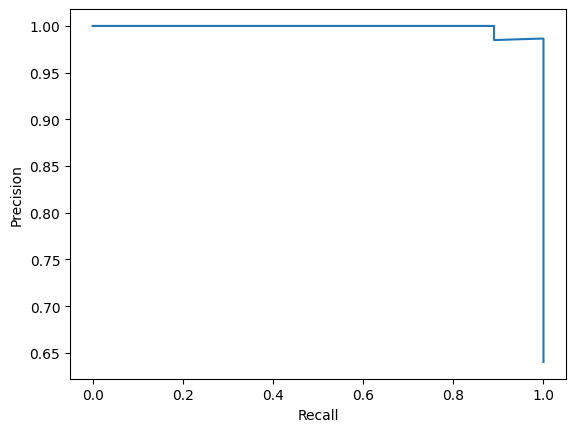

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

21. Compare Solvers

In [ ]:
for solver in ['liblinear', 'lbfgs', 'saga']:
    model = LogisticRegression(solver=solver, max_iter=5000)
    model.fit(X_train, y_train)
    print(solver, accuracy_score(y_test, model.predict(X_test)))

liblinear 0.956140350877193
lbfgs 0.9649122807017544
saga 0.9385964912280702


22. Matthews Correlation Coefficient (MCC)

In [ ]:
from sklearn.metrics import matthews_corrcoef

print("MCC:", matthews_corrcoef(y_test, y_pred))

MCC: 0.9047522748893612


23. Raw vs Standardized Comparison

In [ ]:
model.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, model.predict(X_test))

model.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model.predict(X_test_scaled))

print("Raw:", acc_raw)
print("Scaled:", acc_scaled)

Raw: 0.9385964912280702
Scaled: 0.9912280701754386


24. Optimal C using CV

In [ ]:

params = {'C': np.logspace(-3, 3, 10)}

grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

print("Optimal C:", grid.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal C: {'C': np.float64(215.44346900318823)}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


25. Save & Load Model

In [ ]:
import joblib
from sklearn.metrics import accuracy_score

joblib.dump(model, "logistic_model.pkl")

loaded_model = joblib.load("logistic_model.pkl")
print("Loaded Model Accuracy:",
      accuracy_score(y_test, loaded_model.predict(X_test)))

Loaded Model Accuracy: 0.956140350877193
